In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 <h2 style='text-align: center;'> ANALISIS EXPLORATORIO DE DATOS </h2>

In [47]:
df = pd.read_csv('base/EmailPishing.csv')
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [49]:
print(len(df))
df['label'].value_counts()

39154


label
1    21842
0    17312
Name: count, dtype: int64

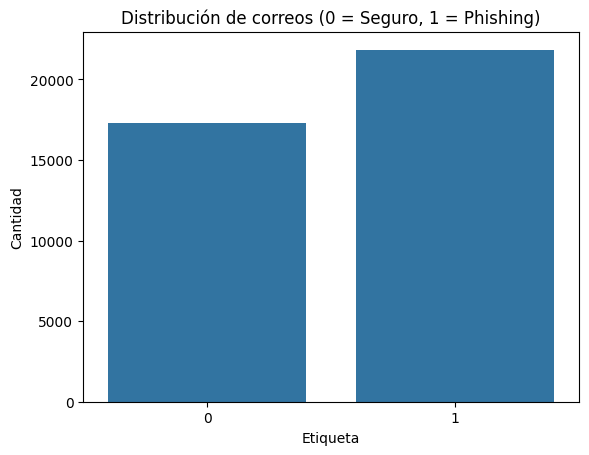

In [50]:
sns.countplot(data=df, x='label')
plt.title("Distribución de correos (0 = Seguro, 1 = Phishing)")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad")
plt.show()

In [53]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [54]:
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour


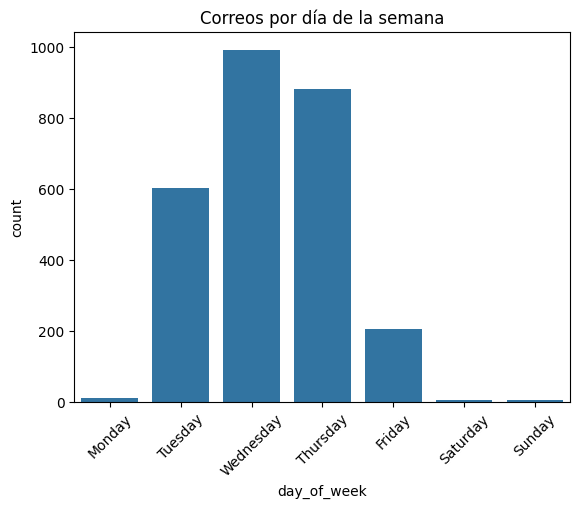

In [55]:
sns.countplot(data=df, x='day_of_week', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Correos por día de la semana")
plt.xticks(rotation=45)
plt.show()

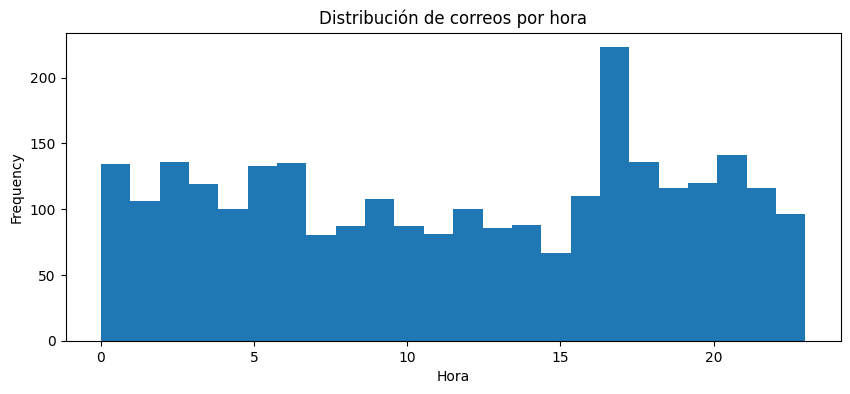

In [56]:
plt.figure(figsize=(10, 4))
df['hour'].plot.hist(bins=24)
plt.title("Distribución de correos por hora")
plt.xlabel("Hora")
plt.show()

In [57]:
sender_domains = df['sender'].str.extract(r'@(\S+)')
sender_domains.columns = ['domain']
print("Dominios más comunes en emisores:")
print(sender_domains['domain'].value_counts().head(10))

Dominios más comunes en emisores:
domain
gmail.com>               2628
python.org>               527
issues.apache.org         462
v.loewis.de>              289
google.com>               239
telefonica.net>           209
lists.techtarget.com>     199
yahoo.com>                185
massey.ac.nz              183
hotpop.com>               183
Name: count, dtype: int64


In [58]:
print("Receptores únicos:", df['receiver'].nunique())

Receptores únicos: 3693


In [59]:
df['subject_length'] = df['subject'].astype(str).apply(len)


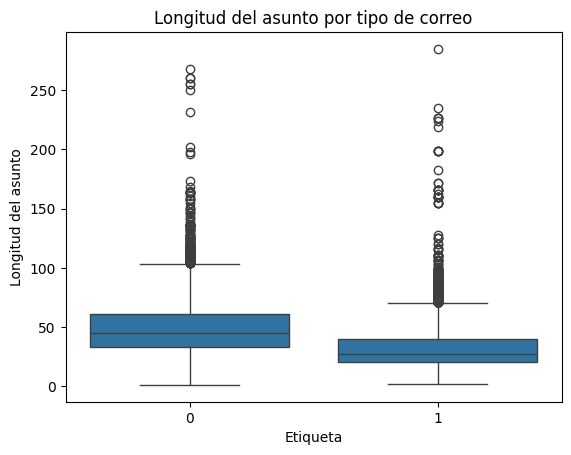

In [60]:
sns.boxplot(x='label', y='subject_length', data=df)
plt.title("Longitud del asunto por tipo de correo")
plt.xlabel("Etiqueta")
plt.ylabel("Longitud del asunto")
plt.show()

In [61]:
df['body_length'] = df['body'].astype(str).apply(len)


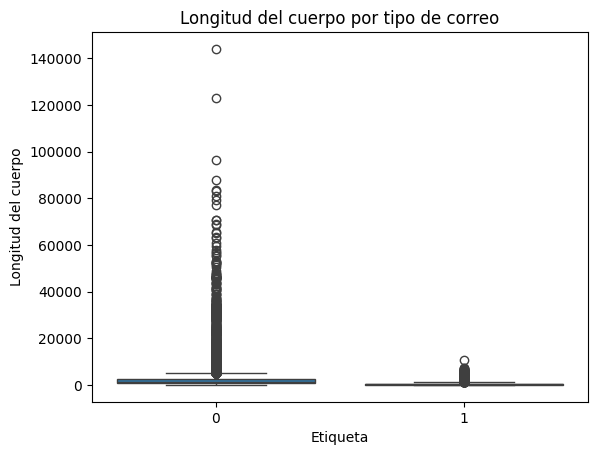

In [62]:
sns.boxplot(x='label', y='body_length', data=df)
plt.title("Longitud del cuerpo por tipo de correo")
plt.xlabel("Etiqueta")
plt.ylabel("Longitud del cuerpo")
plt.show()

In [63]:
url_distribution = df.groupby('label')['urls'].value_counts().unstack()
print("Distribución de presencia de URLs por clase:")
print(url_distribution)

Distribución de presencia de URLs por clase:
urls      0      1
label             
0      5969  11343
1      6953  14889


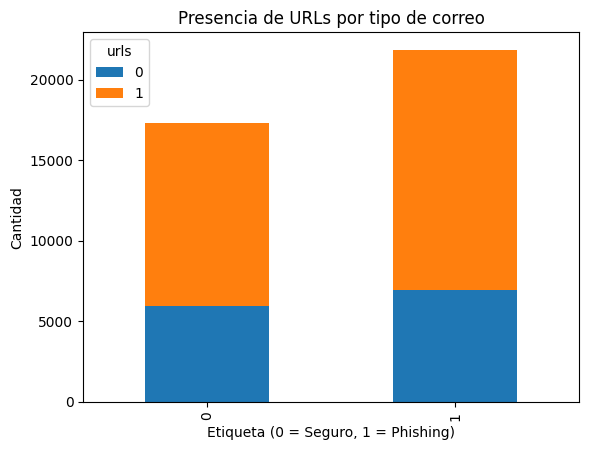

In [64]:
url_distribution.plot(kind='bar', stacked=True)
plt.title("Presencia de URLs por tipo de correo")
plt.xlabel("Etiqueta (0 = Seguro, 1 = Phishing)")
plt.ylabel("Cantidad")
plt.show()

In [65]:
duplicates = df.duplicated(subset=['subject', 'body'])
print("Correos duplicados:", duplicates.sum())


Correos duplicados: 0


In [66]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
sender                0
receiver            462
date              36449
subject              28
body                  0
label                 0
urls                  0
day_of_week       36449
hour              36449
subject_length        0
body_length           0
dtype: int64


In [67]:
features_df = df[['subject_length', 'body_length', 'urls', 'hour']]
print("Primeras filas de features seleccionadas:")
print(features_df.head())


Primeras filas de features seleccionadas:
   subject_length  body_length  urls  hour
0              25          273     1  16.0
1              22           82     1   NaN
2              20         3918     1   NaN
3             150        24418     1   NaN
4              26          175     1   NaN
